In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
from scipy.stats import loglaplace,chi2
from labellines import labelLine, labelLines

dir = '/home/joe/data/jhu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

dataConfirmed = dir + 'time_series_19-covid-Confirmed.csv'
dataDeaths = dir + 'time_series_19-covid-Deaths.csv'
dataRecovered = dir + 'time_series_19-covid-Recovered.csv'

nTop = 10

dfConfirmed = pd.read_csv(dataConfirmed)
dfDeaths = pd.read_csv(dataDeaths)
dfRecovered = pd.read_csv(dataRecovered)
dfConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [39]:
dfC = dfConfirmed.drop(['Province/State','Lat','Long'],axis=1)
dfC = dfC.rename(columns={"Country/Region": 'country'})
dfC.head()

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,53,59,70,75,82,114,147,177,212,272
1,Japan,2,1,2,2,4,4,7,7,11,...,581,639,639,701,773,839,825,878,889,924
2,Singapore,0,1,3,3,4,5,7,7,10,...,160,178,178,200,212,226,243,266,313,345
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,129,149,149,197,238,428,566,673,790,900


In [65]:
cumCasesName = 'Cumulative Cases'
dfG = dfC.groupby('country')[dfC.columns[-1]].sum().reset_index(name=cumCasesName)
countries = dfG.country.tolist()

In [60]:
allCases = dfG[cumCasesName].sum()
dfT = dfG.sort_values(cumCasesName, ascending=False).head(nTop)
topCases = dfT[cumCasesName].sum()
otherCases = allCases - topCases
print(allCases)
print(topCases)
print(otherCases)

dfOtherRow = pd.DataFrame({"country":['Other'], "Cumulative Cases":[otherCases]}) 
dfTO = dfT.append(dfOtherRow)
dfTO

242708
213861
28847


,country,Cumulative Cases
30,China,81156
73,Italy,41035
69,Iran,18407
133,Spain,17963
57,Germany,15320
146,US,13677
53,France,10947
79,"Korea, South",8565
138,Switzerland,4075
149,United Kingdom,2716


In [41]:
dfC

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,53,59,70,75,82,114,147,177,212,272
1,Japan,2,1,2,2,4,4,7,7,11,...,581,639,639,701,773,839,825,878,889,924
2,Singapore,0,1,3,3,4,5,7,7,10,...,160,178,178,200,212,226,243,266,313,345
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,129,149,149,197,238,428,566,673,790,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
464,Chad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465,El Salvador,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466,Fiji,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
dates = dfC.columns[1:]
dfS = pd.DataFrame(columns=dates.insert(0,'country'))
dfS

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20


In [74]:
for date in dates:
    dfGdate = dfC.groupby('country')[date].sum().reset_index(name=cumCasesName)
    for country in countries:
        print(country)
        row = dfGdate.loc[dfGdate['country'] == country]
        print(row)

Afghanistan
       country  Cumulative Cases
0  Afghanistan                 0
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                 0
Andorra
   country  Cumulative Cases
3  Andorra                 0
Antigua and Barbuda
               country  Cumulative Cases
4  Antigua and Barbuda                 0
Argentina
     country  Cumulative Cases
5  Argentina                 0
Armenia
   country  Cumulative Cases
6  Armenia                 0
Australia
     country  Cumulative Cases
7  Australia                 0
Austria
   country  Cumulative Cases
8  Austria                 0
Azerbaijan
      country  Cumulative Cases
9  Azerbaijan                 0
Bahamas, The
         country  Cumulative Cases
10  Bahamas, The                 0
Bahrain
    country  Cumulative Cases
11  Bahrain                 0
Bangladesh
       country  Cumulative Cases
12  Bangladesh                 0
Barbados
     country  Cumulative Cases
13 

117   Qatar                 0
Romania
     country  Cumulative Cases
118  Romania                 0
Russia
    country  Cumulative Cases
119  Russia                 0
Rwanda
    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                 0
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 0
Senegal
     country  Cumulative Cases
125  Senegal                 0
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       country  Cumulative Cases
128  Singapore                 0
Slovakia
      country  Cumulative Cases
129  Slovakia                 0
Slovenia
 

73   Italy                 0
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan                 1
Jordan
   country  Cumulative Cases
76  Jordan                 0
Kazakhstan
       country  Cumulative Cases
77  Kazakhstan                 0
Kenya
   country  Cumulative Cases
78   Kenya                 0
Korea, South
         country  Cumulative Cases
79  Korea, South                 1
Kosovo
   country  Cumulative Cases
80  Kosovo                 0
Kuwait
   country  Cumulative Cases
81  Kuwait                 0
Kyrgyzstan
       country  Cumulative Cases
82  Kyrgyzstan                 0
Latvia
   country  Cumulative Cases
83  Latvia                 0
Lebanon
    country  Cumulative Cases
84  Lebanon                 0
Liberia
    country  Cumulative Cases
85  Liberia                 0
Liechtenstein
          country  Cumulative Cases
86  Liechtenstein                 0
Lithuania
      country  Cumulative Cases
87  Lithuania 

40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 0
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                 0
Ecuador
    country  Cumulative Cases
44  Ecuador                 0
Egypt
   country  Cumulative Cases
45   Egypt                 0
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Equatorial Guinea
              country  Cumulative Cases
47  Equatorial Guinea                 0
Estonia
    country  Cumulative Cases
48  Estonia                 0
Eswatini
     country  Cumulative Cases
49  Eswatini                 0
Ethiopia
     country  Cumulative Cases
50  Ethiopia                 0
Fiji
   country  Cumulative Cases
51    Fiji                 0
Finland
    country  Cumulative Cases
52  Finland                 0
France
   country  Cumulative Cases
53  France                 2
Gabon
   count

14  Belarus                 0
Belgium
    country  Cumulative Cases
15  Belgium                 0
Benin
   country  Cumulative Cases
16   Benin                 0
Bhutan
   country  Cumulative Cases
17  Bhutan                 0
Bolivia
    country  Cumulative Cases
18  Bolivia                 0
Bosnia and Herzegovina
                   country  Cumulative Cases
19  Bosnia and Herzegovina                 0
Brazil
   country  Cumulative Cases
20  Brazil                 0
Brunei
   country  Cumulative Cases
21  Brunei                 0
Bulgaria
     country  Cumulative Cases
22  Bulgaria                 0
Burkina Faso
         country  Cumulative Cases
23  Burkina Faso                 0
Cambodia
     country  Cumulative Cases
24  Cambodia                 0
Cameroon
     country  Cumulative Cases
25  Cameroon                 0
Canada
   country  Cumulative Cases
26  Canada                 0
Central African Republic
                     country  Cumulative Cases
27  Central African Republic 

136  Suriname                 0
Sweden
    country  Cumulative Cases
137  Sweden                 0
Switzerland
         country  Cumulative Cases
138  Switzerland                 0
Taiwan*
     country  Cumulative Cases
139  Taiwan*                 3
Tanzania
      country  Cumulative Cases
140  Tanzania                 0
Thailand
      country  Cumulative Cases
141  Thailand                 7
Togo
    country  Cumulative Cases
142    Togo                 0
Trinidad and Tobago
                 country  Cumulative Cases
143  Trinidad and Tobago                 0
Tunisia
     country  Cumulative Cases
144  Tunisia                 0
Turkey
    country  Cumulative Cases
145  Turkey                 0
US
    country  Cumulative Cases
146      US                 2
Ukraine
     country  Cumulative Cases
147  Ukraine                 0
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                 0
United Kingdom
            country  Cumulative Cases


102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             country  Cumulative Cases
107  North Macedonia                 0
Norway
    country  Cumulative Cases
108  Norway                 0
Oman
    country  Cumulative Cases
109    Oman                 0
Pakistan
      country  Cumulative Cases
110  Pakistan                 0
Panama
    country  Cumulative Cases
111  Panama                 0
Paraguay
      country  Cumulative Cases
112  Paraguay                 0
Peru
    country  Cumulative Cases
113    Peru                 0
Philippines
         country  Cumulative Cases
114  Philippines                 0
Poland
    country  Cumulative Cases
115  Poland                 0
Portuga

66  Iceland                 0
India
   country  Cumulative Cases
67   India                 0
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 0
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan                 4
Jordan
   country  Cumulative Cases
76  Jordan                 0
Kazakhstan
       country  Cumulative Cases
77  Kazakhstan                 0
Kenya
   country  Cumulative Cases
78   Kenya                 0
Korea, South
         country  Cumulative Cases
79  Korea, South                 4
Kosovo
   country  Cumulative Cases
80  Kosovo                 0
Kuwait
   country  Cumu

62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 0
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 0
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan                 7
Jordan
   country  Cumulative Cases
76  Jordan                 0
Kazakhstan
       country  Cumulati

60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 0
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 0
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Ca

101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             country  Cumulative Cases
107  North Macedonia                 0
Norway
    country  Cumulative Cases
108  Norway                 0
Oman
    country  Cumulative Cases
109    Oman                 0
Pakistan
      country  Cumulative Cases
110  Pakistan                 0
Panama
    country  Cumulative Cases
111  Panama                 0
Paraguay
      country  Cumulative Cases
112  Paraguay                 0
Peru
    country  Cumulative Cases
113    Peru                 0
Philippines
         country  Cumulative Cases
114  Philippines                 1
Poland


121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                 0
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 0
Senegal
     country  Cumulative Cases
125  Senegal                 0
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       country  Cumulative Cases
128  Singapore                13
Slovakia
      country  Cumulative Cases
129  Slovakia                 0
Slovenia
      country  Cumulative Cases
130  Slovenia                 0
Somalia
     country  Cumulative Cases
131  Somalia                 0
South Africa
          country  Cumulative Cases
132  South Africa                 0
Spain
    country  Cumulative Cases
133   Spain                

144  Tunisia                 0
Turkey
    country  Cumulative Cases
145  Turkey                 0
US
    country  Cumulative Cases
146      US                 8
Ukraine
     country  Cumulative Cases
147  Ukraine                 0
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                 4
United Kingdom
            country  Cumulative Cases
149  United Kingdom                 2
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                 6
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 0
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                

61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 3
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 2
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan                20
Jordan
   country  Cumulative Cases

30   China             23707
Colombia
     country  Cumulative Cases
31  Colombia                 0
Congo (Brazzaville)
                country  Cumulative Cases
32  Congo (Brazzaville)                 0
Congo (Kinshasa)
             country  Cumulative Cases
33  Congo (Kinshasa)                 0
Costa Rica
       country  Cumulative Cases
34  Costa Rica                 0
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 0
Croatia
    country  Cumulative Cases
36  Croatia                 0
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship                 0
Cuba
   country  Cumulative Cases
38    Cuba                 0
Cyprus
   country  Cumulative Cases
39  Cyprus                 0
Czechia
    country  Cumulative Cases
40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 0
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative C

52  Finland                 1
France
   country  Cumulative Cases
53  France                 6
Gabon
   country  Cumulative Cases
54   Gabon                 0
Gambia, The
        country  Cumulative Cases
55  Gambia, The                 0
Georgia
    country  Cumulative Cases
56  Georgia                 0
Germany
    country  Cumulative Cases
57  Germany                12
Ghana
   country  Cumulative Cases
58   Ghana                 0
Greece
   country  Cumulative Cases
59  Greece                 0
Guatemala
      country  Cumulative Cases
60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   count

14  Belarus                 0
Belgium
    country  Cumulative Cases
15  Belgium                 1
Benin
   country  Cumulative Cases
16   Benin                 0
Bhutan
   country  Cumulative Cases
17  Bhutan                 0
Bolivia
    country  Cumulative Cases
18  Bolivia                 0
Bosnia and Herzegovina
                   country  Cumulative Cases
19  Bosnia and Herzegovina                 0
Brazil
   country  Cumulative Cases
20  Brazil                 0
Brunei
   country  Cumulative Cases
21  Brunei                 0
Bulgaria
     country  Cumulative Cases
22  Bulgaria                 0
Burkina Faso
         country  Cumulative Cases
23  Burkina Faso                 0
Cambodia
     country  Cumulative Cases
24  Cambodia                 1
Cameroon
     country  Cumulative Cases
25  Cameroon                 0
Canada
   country  Cumulative Cases
26  Canada                 5
Central African Republic
                     country  Cumulative Cases
27  Central African Republic 

145  Turkey                 0
US
    country  Cumulative Cases
146      US                11
Ukraine
     country  Cumulative Cases
147  Ukraine                 0
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                 5
United Kingdom
            country  Cumulative Cases
149  United Kingdom                 2
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                10
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 0
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                 0
Andorra
   country  Cumulative Cases
3  Andorra                 0

122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                 0
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 0
Senegal
     country  Cumulative Cases
125  Senegal                 0
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       country  Cumulative Cases
128  Singapore                30
Slovakia
      country  Cumulative Cases
129  Slovakia                 0
Slovenia
      country  Cumulative Cases
130  Slovenia                 0
Somalia
     country  Cumulative Cases
131  Somalia                 0
South Africa
          country  Cumulative Cases
132  South Africa                 0
Spain
    country  Cumulative Cases
133   Spain                 1
Sri Lanka
       country  Cumulative Cases
134  Sri Lanka                 1
Sudan
    country  Cumulative Cases
135   Sud

       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                13
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 0
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                 0
Andorra
   country  Cumulative Cases
3  Andorra                 0
Antigua and Barbuda
               country  Cumulative Cases
4  Antigua and Barbuda                 0
Argentina
     country  Cumulative Cases
5  Argentina                 0
Armenia
   country  Cumulative Cases
6  Armenia                 0
Australia
     country  Cumulative Cases
7  Australia                15
Austria
   country  Cumulative Cases
8  Austria                 0
Azerbaijan
      country  Cumulative Cases
9  Azerbaijan                 0
Bahamas, The
         country  Cumulative Cases
10  Bahamas, The    

59  Greece                 0
Guatemala
      country  Cumulative Cases
60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 3
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 3
Jamaica
    country  Cumulat

93  Mauritania                 0
Mauritius
      country  Cumulative Cases
94  Mauritius                 0
Mexico
   country  Cumulative Cases
95  Mexico                 0
Moldova
    country  Cumulative Cases
96  Moldova                 0
Monaco
   country  Cumulative Cases
97  Monaco                 0
Mongolia
     country  Cumulative Cases
98  Mongolia                 0
Montenegro
       country  Cumulative Cases
99  Montenegro                 0
Morocco
     country  Cumulative Cases
100  Morocco                 0
Namibia
     country  Cumulative Cases
101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             co

80  Kosovo                 0
Kuwait
   country  Cumulative Cases
81  Kuwait                 0
Kyrgyzstan
       country  Cumulative Cases
82  Kyrgyzstan                 0
Latvia
   country  Cumulative Cases
83  Latvia                 0
Lebanon
    country  Cumulative Cases
84  Lebanon                 0
Liberia
    country  Cumulative Cases
85  Liberia                 0
Liechtenstein
          country  Cumulative Cases
86  Liechtenstein                 0
Lithuania
      country  Cumulative Cases
87  Lithuania                 0
Luxembourg
       country  Cumulative Cases
88  Luxembourg                 0
Malaysia
     country  Cumulative Cases
89  Malaysia                18
Maldives
     country  Cumulative Cases
90  Maldives                 0
Malta
   country  Cumulative Cases
91   Malta                 0
Martinique
       country  Cumulative Cases
92  Martinique                 0
Mauritania
       country  Cumulative Cases
93  Mauritania                 0
Mauritius
      country  Cumula

96  Moldova                 0
Monaco
   country  Cumulative Cases
97  Monaco                 0
Mongolia
     country  Cumulative Cases
98  Mongolia                 0
Montenegro
       country  Cumulative Cases
99  Montenegro                 0
Morocco
     country  Cumulative Cases
100  Morocco                 0
Namibia
     country  Cumulative Cases
101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             country  Cumulative Cases
107  North Macedonia                 0
Norway
    country  Cumulative Cases
108  Norway                 0
Oman
    country  Cumulative Cases
109    Oman                 0
Pakistan
      

52  Finland                 1
France
   country  Cumulative Cases
53  France                11
Gabon
   country  Cumulative Cases
54   Gabon                 0
Gambia, The
        country  Cumulative Cases
55  Gambia, The                 0
Georgia
    country  Cumulative Cases
56  Georgia                 0
Germany
    country  Cumulative Cases
57  Germany                16
Ghana
   country  Cumulative Cases
58   Ghana                 0
Greece
   country  Cumulative Cases
59  Greece                 0
Guatemala
      country  Cumulative Cases
60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   count

110  Pakistan                 0
Panama
    country  Cumulative Cases
111  Panama                 0
Paraguay
      country  Cumulative Cases
112  Paraguay                 0
Peru
    country  Cumulative Cases
113    Peru                 0
Philippines
         country  Cumulative Cases
114  Philippines                 3
Poland
    country  Cumulative Cases
115  Poland                 0
Portugal
      country  Cumulative Cases
116  Portugal                 0
Qatar
    country  Cumulative Cases
117   Qatar                 0
Romania
     country  Cumulative Cases
118  Romania                 0
Russia
    country  Cumulative Cases
119  Russia                 2
Rwanda
    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases

    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                 0
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 0
Senegal
     country  Cumulative Cases
125  Senegal                 0
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       country  Cumulative Cases
128  Singapore                75
Slovakia
      country  Cumulative Cases
129  Slovakia                 0
Slovenia
      country  Cumulative Cases
130  Slovenia                 0
Somalia
     country  Cumulative Cases
131  Somalia                 0
South Africa
          country  Cumulativ

102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             country  Cumulative Cases
107  North Macedonia                 0
Norway
    country  Cumulative Cases
108  Norway                 0
Oman
    country  Cumulative Cases
109    Oman                 0
Pakistan
      country  Cumulative Cases
110  Pakistan                 0
Panama
    country  Cumulative Cases
111  Panama                 0
Paraguay
      country  Cumulative Cases
112  Paraguay                 0
Peru
    country  Cumulative Cases
113    Peru                 0
Philippines
         country  Cumulative Cases
114  Philippines                 3
Poland
    country  Cumulative Cases
115  Poland                 0
Portuga

61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 3
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 0
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulative Cases
73   Italy                 3
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan                74
Jordan
   country  Cumulative Cases

58   Ghana                 0
Greece
   country  Cumulative Cases
59  Greece                 0
Guatemala
      country  Cumulative Cases
60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana
   country  Cumulative Cases
62  Guyana                 0
Holy See
     country  Cumulative Cases
63  Holy See                 0
Honduras
     country  Cumulative Cases
64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 0
India
   country  Cumulative Cases
67   India                 3
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran                 2
Iraq
   country  Cumulative Cases
70    Iraq                 0
Ireland
    country  Cumulative Cases
71  Ireland                 0
Israel
   country  Cumulative Cases
72  Israel                 0
Italy
   country  Cumulativ

    country  Cumulative Cases
44  Ecuador                 0
Egypt
   country  Cumulative Cases
45   Egypt                 1
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Equatorial Guinea
              country  Cumulative Cases
47  Equatorial Guinea                 0
Estonia
    country  Cumulative Cases
48  Estonia                 0
Eswatini
     country  Cumulative Cases
49  Eswatini                 0
Ethiopia
     country  Cumulative Cases
50  Ethiopia                 0
Fiji
   country  Cumulative Cases
51    Fiji                 0
Finland
    country  Cumulative Cases
52  Finland                 1
France
   country  Cumulative Cases
53  France                12
Gabon
   country  Cumulative Cases
54   Gabon                 0
Gambia, The
        country  Cumulative Cases
55  Gambia, The                 0
Georgia
    country  Cumulative Cases
56  Georgia                 0
Germany
    country  Cumulative Cases
57  Germany                16
Ghana
   cou

29   Chile                 0
China
   country  Cumulative Cases
30   China             75550
Colombia
     country  Cumulative Cases
31  Colombia                 0
Congo (Brazzaville)
                country  Cumulative Cases
32  Congo (Brazzaville)                 0
Congo (Kinshasa)
             country  Cumulative Cases
33  Congo (Kinshasa)                 0
Costa Rica
       country  Cumulative Cases
34  Costa Rica                 0
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 0
Croatia
    country  Cumulative Cases
36  Croatia                 0
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship               634
Cuba
   country  Cumulative Cases
38    Cuba                 0
Cyprus
   country  Cumulative Cases
39  Cyprus                 0
Czechia
    country  Cumulative Cases
40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 0
Djibouti
     country  Cumulative Cases
42  Djibouti          

39  Cyprus                 0
Czechia
    country  Cumulative Cases
40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 0
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                 0
Ecuador
    country  Cumulative Cases
44  Ecuador                 0
Egypt
   country  Cumulative Cases
45   Egypt                 1
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Equatorial Guinea
              country  Cumulative Cases
47  Equatorial Guinea                 0
Estonia
    country  Cumulative Cases
48  Estonia                 0
Eswatini
     country  Cumulative Cases
49  Eswatini                 0
Ethiopia
     country  Cumulative Cases
50  Ethiopia                 0
Fiji
   country  Cumulative Cases
51    Fiji                 0
Finland
    country  Cumulative Cases
52  Finland                 1
France
   co

95  Mexico                 0
Moldova
    country  Cumulative Cases
96  Moldova                 0
Monaco
   country  Cumulative Cases
97  Monaco                 0
Mongolia
     country  Cumulative Cases
98  Mongolia                 0
Montenegro
       country  Cumulative Cases
99  Montenegro                 0
Morocco
     country  Cumulative Cases
100  Morocco                 0
Namibia
     country  Cumulative Cases
101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Netherlands                 0
New Zealand
         country  Cumulative Cases
104  New Zealand                 0
Nicaragua
       country  Cumulative Cases
105  Nicaragua                 0
Nigeria
     country  Cumulative Cases
106  Nigeria                 0
North Macedonia
             country  Cumulative Cases
107  North Macedonia                 0
Norway
    country  Cumulative Cases
108  Norway                 0
Oman
    coun

149  United Kingdom                13
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                16
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 1
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                 1
Andorra
   country  Cumulative Cases
3  Andorra                 0
Antigua and Barbuda
               country  Cumulative Cases
4  Antigua and Barbuda                 0
Argentina
     country  Cumulative Cases
5  Argentina                 0
Armenia
   country  Cumulative Cases
6  Armenia                 0
Australia
     country  Cumulative Cases
7  Australia                22
Austria
   c

     country  Cumulative Cases
31  Colombia                 0
Congo (Brazzaville)
                country  Cumulative Cases
32  Congo (Brazzaville)                 0
Congo (Kinshasa)
             country  Cumulative Cases
33  Congo (Kinshasa)                 0
Costa Rica
       country  Cumulative Cases
34  Costa Rica                 0
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 0
Croatia
    country  Cumulative Cases
36  Croatia                 3
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship               705
Cuba
   country  Cumulative Cases
38    Cuba                 0
Cyprus
   country  Cumulative Cases
39  Cyprus                 0
Czechia
    country  Cumulative Cases
40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 0
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic           

32  Congo (Brazzaville)                 0
Congo (Kinshasa)
             country  Cumulative Cases
33  Congo (Kinshasa)                 0
Costa Rica
       country  Cumulative Cases
34  Costa Rica                 0
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 0
Croatia
    country  Cumulative Cases
36  Croatia                 3
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship               705
Cuba
   country  Cumulative Cases
38    Cuba                 0
Cyprus
   country  Cumulative Cases
39  Cyprus                 0
Czechia
    country  Cumulative Cases
40  Czechia                 0
Denmark
    country  Cumulative Cases
41  Denmark                 1
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                 0
Ecuador
    country  Cumulative Cases
44  Ecuador                 0
Egypt
   country  Cumulative Cases
45   Egypt   

148  United Arab Emirates                13
United Kingdom
            country  Cumulative Cases
149  United Kingdom                15
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                16
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 1
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                 1
Andorra
   country  Cumulative Cases
3  Andorra                 0
Antigua and Barbuda
               country  Cumulative Cases
4  Antigua and Barbuda                 0
Argentina
     country  Cumulative Cases
5  Argentina                 0
Armenia
   country  Cumulative Cases
6  Armenia      

116  Portugal                 0
Qatar
    country  Cumulative Cases
117   Qatar                 0
Romania
     country  Cumulative Cases
118  Romania                 3
Russia
    country  Cumulative Cases
119  Russia                 2
Rwanda
    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                 1
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 0
Senegal
     country  Cumulative Cases
125  Senegal                 0
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       country  Cumulative Cases
128  Singapore                93
Slovakia
      

89  Malaysia                25
Maldives
     country  Cumulative Cases
90  Maldives                 0
Malta
   country  Cumulative Cases
91   Malta                 0
Martinique
       country  Cumulative Cases
92  Martinique                 0
Mauritania
       country  Cumulative Cases
93  Mauritania                 0
Mauritius
      country  Cumulative Cases
94  Mauritius                 0
Mexico
   country  Cumulative Cases
95  Mexico                 4
Moldova
    country  Cumulative Cases
96  Moldova                 0
Monaco
   country  Cumulative Cases
97  Monaco                 1
Mongolia
     country  Cumulative Cases
98  Mongolia                 0
Montenegro
       country  Cumulative Cases
99  Montenegro                 0
Morocco
     country  Cumulative Cases
100  Morocco                 0
Namibia
     country  Cumulative Cases
101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal                 1
Netherlands
         country  Cumulative Cases
103  Ne

64  Honduras                 0
Hungary
    country  Cumulative Cases
65  Hungary                 0
Iceland
    country  Cumulative Cases
66  Iceland                 3
India
   country  Cumulative Cases
67   India                 3
Indonesia
      country  Cumulative Cases
68  Indonesia                 0
Iran
   country  Cumulative Cases
69    Iran               978
Iraq
   country  Cumulative Cases
70    Iraq                19
Ireland
    country  Cumulative Cases
71  Ireland                 1
Israel
   country  Cumulative Cases
72  Israel                10
Italy
   country  Cumulative Cases
73   Italy              1694
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan               256
Jordan
   country  Cumulative Cases
76  Jordan                 0
Kazakhstan
       country  Cumulative Cases
77  Kazakhstan                 0
Kenya
   country  Cumulative Cases
78   Kenya                 0
Korea, South
         country  Cum

47  Equatorial Guinea                 0
Estonia
    country  Cumulative Cases
48  Estonia                 1
Eswatini
     country  Cumulative Cases
49  Eswatini                 0
Ethiopia
     country  Cumulative Cases
50  Ethiopia                 0
Fiji
   country  Cumulative Cases
51    Fiji                 0
Finland
    country  Cumulative Cases
52  Finland                 6
France
   country  Cumulative Cases
53  France               191
Gabon
   country  Cumulative Cases
54   Gabon                 0
Gambia, The
        country  Cumulative Cases
55  Gambia, The                 0
Georgia
    country  Cumulative Cases
56  Georgia                 3
Germany
    country  Cumulative Cases
57  Germany               159
Ghana
   country  Cumulative Cases
58   Ghana                 0
Greece
   country  Cumulative Cases
59  Greece                 7
Guatemala
      country  Cumulative Cases
60  Guatemala                 0
Guinea
   country  Cumulative Cases
61  Guinea                 0
Guyana

16   Benin                 0
Bhutan
   country  Cumulative Cases
17  Bhutan                 0
Bolivia
    country  Cumulative Cases
18  Bolivia                 0
Bosnia and Herzegovina
                   country  Cumulative Cases
19  Bosnia and Herzegovina                 0
Brazil
   country  Cumulative Cases
20  Brazil                 2
Brunei
   country  Cumulative Cases
21  Brunei                 0
Bulgaria
     country  Cumulative Cases
22  Bulgaria                 0
Burkina Faso
         country  Cumulative Cases
23  Burkina Faso                 0
Cambodia
     country  Cumulative Cases
24  Cambodia                 1
Cameroon
     country  Cumulative Cases
25  Cameroon                 0
Canada
   country  Cumulative Cases
26  Canada                30
Central African Republic
                     country  Cumulative Cases
27  Central African Republic                 0
Chad
   country  Cumulative Cases
28    Chad                 0
Chile
   country  Cumulative Cases
29   Chile       

144  Tunisia                 0
Turkey
    country  Cumulative Cases
145  Turkey                 0
US
    country  Cumulative Cases
146      US               118
Ukraine
     country  Cumulative Cases
147  Ukraine                 1
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                27
United Kingdom
            country  Cumulative Cases
149  United Kingdom                51
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                16
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 1
Albania
   country  Cumulative Cases
1  Albania                 0
Algeria
   country  Cumulative Cases
2  Algeria                

115  Poland                 1
Portugal
      country  Cumulative Cases
116  Portugal                 5
Qatar
    country  Cumulative Cases
117   Qatar                 8
Romania
     country  Cumulative Cases
118  Romania                 4
Russia
    country  Cumulative Cases
119  Russia                 3
Rwanda
    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                16
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia                 1
Senegal
     country  Cumulative Cases
125  Senegal                 4
Serbia
    country  Cumulative Cases
126  Serbia                 0
Seychelles
        country  Cumulative Cases
127  Seychelles                 0
Singapore
       cou

88  Luxembourg                 1
Malaysia
     country  Cumulative Cases
89  Malaysia                50
Maldives
     country  Cumulative Cases
90  Maldives                 0
Malta
   country  Cumulative Cases
91   Malta                 0
Martinique
       country  Cumulative Cases
92  Martinique                 0
Mauritania
       country  Cumulative Cases
93  Mauritania                 0
Mauritius
      country  Cumulative Cases
94  Mauritius                 0
Mexico
   country  Cumulative Cases
95  Mexico                 5
Moldova
    country  Cumulative Cases
96  Moldova                 0
Monaco
   country  Cumulative Cases
97  Monaco                 1
Mongolia
     country  Cumulative Cases
98  Mongolia                 0
Montenegro
       country  Cumulative Cases
99  Montenegro                 0
Morocco
     country  Cumulative Cases
100  Morocco                 2
Namibia
     country  Cumulative Cases
101  Namibia                 0
Nepal
    country  Cumulative Cases
102   Nepal

69    Iran              4747
Iraq
   country  Cumulative Cases
70    Iraq                40
Ireland
    country  Cumulative Cases
71  Ireland                18
Israel
   country  Cumulative Cases
72  Israel                37
Italy
   country  Cumulative Cases
73   Italy              4636
Jamaica
    country  Cumulative Cases
74  Jamaica                 0
Japan
   country  Cumulative Cases
75   Japan               420
Jordan
   country  Cumulative Cases
76  Jordan                 1
Kazakhstan
       country  Cumulative Cases
77  Kazakhstan                 0
Kenya
   country  Cumulative Cases
78   Kenya                 0
Korea, South
         country  Cumulative Cases
79  Korea, South              6593
Kosovo
   country  Cumulative Cases
80  Kosovo                 0
Kuwait
   country  Cumulative Cases
81  Kuwait                58
Kyrgyzstan
       country  Cumulative Cases
82  Kyrgyzstan                 0
Latvia
   country  Cumulative Cases
83  Latvia                 1
Lebanon
    countr

40  Czechia                19
Denmark
    country  Cumulative Cases
41  Denmark                24
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                 2
Ecuador
    country  Cumulative Cases
44  Ecuador                13
Egypt
   country  Cumulative Cases
45   Egypt                15
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Equatorial Guinea
              country  Cumulative Cases
47  Equatorial Guinea                 0
Estonia
    country  Cumulative Cases
48  Estonia                10
Eswatini
     country  Cumulative Cases
49  Eswatini                 0
Ethiopia
     country  Cumulative Cases
50  Ethiopia                 0
Fiji
   country  Cumulative Cases
51    Fiji                 0
Finland
    country  Cumulative Cases
52  Finland                15
France
   country  Cumulative Cases
53  France               957
Gabon
   count

7  Australia                76
Austria
   country  Cumulative Cases
8  Austria               104
Azerbaijan
      country  Cumulative Cases
9  Azerbaijan                 9
Bahamas, The
         country  Cumulative Cases
10  Bahamas, The                 0
Bahrain
    country  Cumulative Cases
11  Bahrain                85
Bangladesh
       country  Cumulative Cases
12  Bangladesh                 3
Barbados
     country  Cumulative Cases
13  Barbados                 0
Belarus
    country  Cumulative Cases
14  Belarus                 6
Belgium
    country  Cumulative Cases
15  Belgium               200
Benin
   country  Cumulative Cases
16   Benin                 0
Bhutan
   country  Cumulative Cases
17  Bhutan                 1
Bolivia
    country  Cumulative Cases
18  Bolivia                 0
Bosnia and Herzegovina
                   country  Cumulative Cases
19  Bosnia and Herzegovina                 3
Brazil
   country  Cumulative Cases
20  Brazil                20
Brunei
   country 

143  Trinidad and Tobago                 0
Tunisia
     country  Cumulative Cases
144  Tunisia                 2
Turkey
    country  Cumulative Cases
145  Turkey                 0
US
    country  Cumulative Cases
146      US               518
Ukraine
     country  Cumulative Cases
147  Ukraine                 1
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                45
United Kingdom
            country  Cumulative Cases
149  United Kingdom               274
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulative Cases
153  Vietnam                30
Zambia
    country  Cumulative Cases
154  Zambia                 0
Afghanistan
       country  Cumulative Cases
0  Afghanistan                 4
Albania
   country  Cumulative Cases
1  Albania

111  Panama                 0
Paraguay
      country  Cumulative Cases
112  Paraguay                 1
Peru
    country  Cumulative Cases
113    Peru                 7
Philippines
         country  Cumulative Cases
114  Philippines                20
Poland
    country  Cumulative Cases
115  Poland                16
Portugal
      country  Cumulative Cases
116  Portugal                30
Qatar
    country  Cumulative Cases
117   Qatar                18
Romania
     country  Cumulative Cases
118  Romania                15
Russia
    country  Cumulative Cases
119  Russia                17
Rwanda
    country  Cumulative Cases
120  Rwanda                 0
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 0
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 0
San Marino
        country  Cumulative Cases
123  San Marino                36
Saudi Arabia
          country  Cu

84  Lebanon                41
Liberia
    country  Cumulative Cases
85  Liberia                 0
Liechtenstein
          country  Cumulative Cases
86  Liechtenstein                 1
Lithuania
      country  Cumulative Cases
87  Lithuania                 1
Luxembourg
       country  Cumulative Cases
88  Luxembourg                 5
Malaysia
     country  Cumulative Cases
89  Malaysia               129
Maldives
     country  Cumulative Cases
90  Maldives                 6
Malta
   country  Cumulative Cases
91   Malta                 5
Martinique
       country  Cumulative Cases
92  Martinique                 2
Mauritania
       country  Cumulative Cases
93  Mauritania                 0
Mauritius
      country  Cumulative Cases
94  Mauritius                 0
Mexico
   country  Cumulative Cases
95  Mexico                 7
Moldova
    country  Cumulative Cases
96  Moldova                 3
Monaco
   country  Cumulative Cases
97  Monaco                 1
Mongolia
     country  Cumulative

64  Honduras                 2
Hungary
    country  Cumulative Cases
65  Hungary                13
Iceland
    country  Cumulative Cases
66  Iceland                85
India
   country  Cumulative Cases
67   India                62
Indonesia
      country  Cumulative Cases
68  Indonesia                34
Iran
   country  Cumulative Cases
69    Iran              9000
Iraq
   country  Cumulative Cases
70    Iraq                71
Ireland
    country  Cumulative Cases
71  Ireland                43
Israel
   country  Cumulative Cases
72  Israel               109
Italy
   country  Cumulative Cases
73   Italy             12462
Jamaica
    country  Cumulative Cases
74  Jamaica                 1
Japan
   country  Cumulative Cases
75   Japan               639
Jordan
   country  Cumulative Cases
76  Jordan                 1
Kazakhstan
       country  Cumulative Cases
77  Kazakhstan                 0
Kenya
   country  Cumulative Cases
78   Kenya                 0
Korea, South
         country  Cum

34  Costa Rica                22
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 1
Croatia
    country  Cumulative Cases
36  Croatia                19
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship               696
Cuba
   country  Cumulative Cases
38    Cuba                 3
Cyprus
   country  Cumulative Cases
39  Cyprus                 6
Czechia
    country  Cumulative Cases
40  Czechia                94
Denmark
    country  Cumulative Cases
41  Denmark               617
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                 5
Ecuador
    country  Cumulative Cases
44  Ecuador                17
Egypt
   country  Cumulative Cases
45   Egypt                67
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Equatorial Guinea
              country  Cumulative Cases
47  Equatorial Guinea      

8  Austria               504
Azerbaijan
      country  Cumulative Cases
9  Azerbaijan                15
Bahamas, The
         country  Cumulative Cases
10  Bahamas, The                 0
Bahrain
    country  Cumulative Cases
11  Bahrain               189
Bangladesh
       country  Cumulative Cases
12  Bangladesh                 3
Barbados
     country  Cumulative Cases
13  Barbados                 0
Belarus
    country  Cumulative Cases
14  Belarus                27
Belgium
    country  Cumulative Cases
15  Belgium               559
Benin
   country  Cumulative Cases
16   Benin                 0
Bhutan
   country  Cumulative Cases
17  Bhutan                 1
Bolivia
    country  Cumulative Cases
18  Bolivia                 3
Bosnia and Herzegovina
                   country  Cumulative Cases
19  Bosnia and Herzegovina                13
Brazil
   country  Cumulative Cases
20  Brazil               151
Brunei
   country  Cumulative Cases
21  Brunei                37
Bulgaria
     country

140  Tanzania                 0
Thailand
      country  Cumulative Cases
141  Thailand                75
Togo
    country  Cumulative Cases
142    Togo                 1
Trinidad and Tobago
                 country  Cumulative Cases
143  Trinidad and Tobago                 0
Tunisia
     country  Cumulative Cases
144  Tunisia                16
Turkey
    country  Cumulative Cases
145  Turkey                 5
US
    country  Cumulative Cases
146      US              2179
Ukraine
     country  Cumulative Cases
147  Ukraine                 3
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates                85
United Kingdom
            country  Cumulative Cases
149  United Kingdom               802
Uruguay
     country  Cumulative Cases
150  Uruguay                 0
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                 0
Venezuela
       country  Cumulative Cases
152  Venezuela                 0
Vietnam
     country  Cumulat

108  Norway              1090
Oman
    country  Cumulative Cases
109    Oman                19
Pakistan
      country  Cumulative Cases
110  Pakistan                31
Panama
    country  Cumulative Cases
111  Panama                36
Paraguay
      country  Cumulative Cases
112  Paraguay                 6
Peru
    country  Cumulative Cases
113    Peru                38
Philippines
         country  Cumulative Cases
114  Philippines               111
Poland
    country  Cumulative Cases
115  Poland               103
Portugal
      country  Cumulative Cases
116  Portugal               169
Qatar
    country  Cumulative Cases
117   Qatar               337
Romania
     country  Cumulative Cases
118  Romania               123
Russia
    country  Cumulative Cases
119  Russia                59
Rwanda
    country  Cumulative Cases
120  Rwanda                 1
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 1
Saint Vincent and the Grenadines
                    

33  Congo (Kinshasa)                 2
Costa Rica
       country  Cumulative Cases
34  Costa Rica                35
Cote d'Ivoire
          country  Cumulative Cases
35  Cote d'Ivoire                 1
Croatia
    country  Cumulative Cases
36  Croatia                57
Cruise Ship
        country  Cumulative Cases
37  Cruise Ship               696
Cuba
   country  Cumulative Cases
38    Cuba                 4
Cyprus
   country  Cumulative Cases
39  Cyprus                33
Czechia
    country  Cumulative Cases
40  Czechia               298
Denmark
    country  Cumulative Cases
41  Denmark               933
Djibouti
     country  Cumulative Cases
42  Djibouti                 0
Dominican Republic
               country  Cumulative Cases
43  Dominican Republic                11
Ecuador
    country  Cumulative Cases
44  Ecuador                37
Egypt
   country  Cumulative Cases
45   Egypt               150
El Salvador
        country  Cumulative Cases
46  El Salvador                 0
Eq

Afghanistan
       country  Cumulative Cases
0  Afghanistan                22
Albania
   country  Cumulative Cases
1  Albania                55
Algeria
   country  Cumulative Cases
2  Algeria                60
Andorra
   country  Cumulative Cases
3  Andorra                39
Antigua and Barbuda
               country  Cumulative Cases
4  Antigua and Barbuda                 1
Argentina
     country  Cumulative Cases
5  Argentina                68
Armenia
   country  Cumulative Cases
6  Armenia                78
Australia
     country  Cumulative Cases
7  Australia               452
Austria
   country  Cumulative Cases
8  Austria              1332
Azerbaijan
      country  Cumulative Cases
9  Azerbaijan                28
Bahamas, The
         country  Cumulative Cases
10  Bahamas, The                 1
Bahrain
    country  Cumulative Cases
11  Bahrain               228
Bangladesh
       country  Cumulative Cases
12  Bangladesh                10
Barbados
     country  Cumulative Cases
13 

118  Romania               184
Russia
    country  Cumulative Cases
119  Russia               114
Rwanda
    country  Cumulative Cases
120  Rwanda                 7
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 2
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 1
San Marino
        country  Cumulative Cases
123  San Marino               109
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia               171
Senegal
     country  Cumulative Cases
125  Senegal                26
Serbia
    country  Cumulative Cases
126  Serbia                65
Seychelles
        country  Cumulative Cases
127  Seychelles                 4
Singapore
       country  Cumulative Cases
128  Singapore               266
Slovakia
      country  Cumulative Cases
129  Slovakia                72
Slovenia
      country  Cumulative Cases
130  Slovenia               275
Somali

144  Tunisia                29
Turkey
    country  Cumulative Cases
145  Turkey                98
US
    country  Cumulative Cases
146      US              7783
Ukraine
     country  Cumulative Cases
147  Ukraine                14
United Arab Emirates
                  country  Cumulative Cases
148  United Arab Emirates               113
United Kingdom
            country  Cumulative Cases
149  United Kingdom              2642
Uruguay
     country  Cumulative Cases
150  Uruguay                50
Uzbekistan
        country  Cumulative Cases
151  Uzbekistan                15
Venezuela
       country  Cumulative Cases
152  Venezuela                36
Vietnam
     country  Cumulative Cases
153  Vietnam                75
Zambia
    country  Cumulative Cases
154  Zambia                 2
Afghanistan
       country  Cumulative Cases
0  Afghanistan                22
Albania
   country  Cumulative Cases
1  Albania                64
Algeria
   country  Cumulative Cases
2  Algeria                

    country  Cumulative Cases
119  Russia               199
Rwanda
    country  Cumulative Cases
120  Rwanda                 8
Saint Lucia
         country  Cumulative Cases
121  Saint Lucia                 2
Saint Vincent and the Grenadines
                              country  Cumulative Cases
122  Saint Vincent and the Grenadines                 1
San Marino
        country  Cumulative Cases
123  San Marino               119
Saudi Arabia
          country  Cumulative Cases
124  Saudi Arabia               274
Senegal
     country  Cumulative Cases
125  Senegal                31
Serbia
    country  Cumulative Cases
126  Serbia               103
Seychelles
        country  Cumulative Cases
127  Seychelles                 6
Singapore
       country  Cumulative Cases
128  Singapore               345
Slovakia
      country  Cumulative Cases
129  Slovakia               123
Slovenia
      country  Cumulative Cases
130  Slovenia               286
Somalia
     country  Cumulative Cases
131  

In [16]:
dfC = dfC.set_index('country').T
dfC = dfC.reset_index()
dfC.head()

country,index,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dfC = dfC.rename(columns={"index": 'date'})
dfC.head()

country,date,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


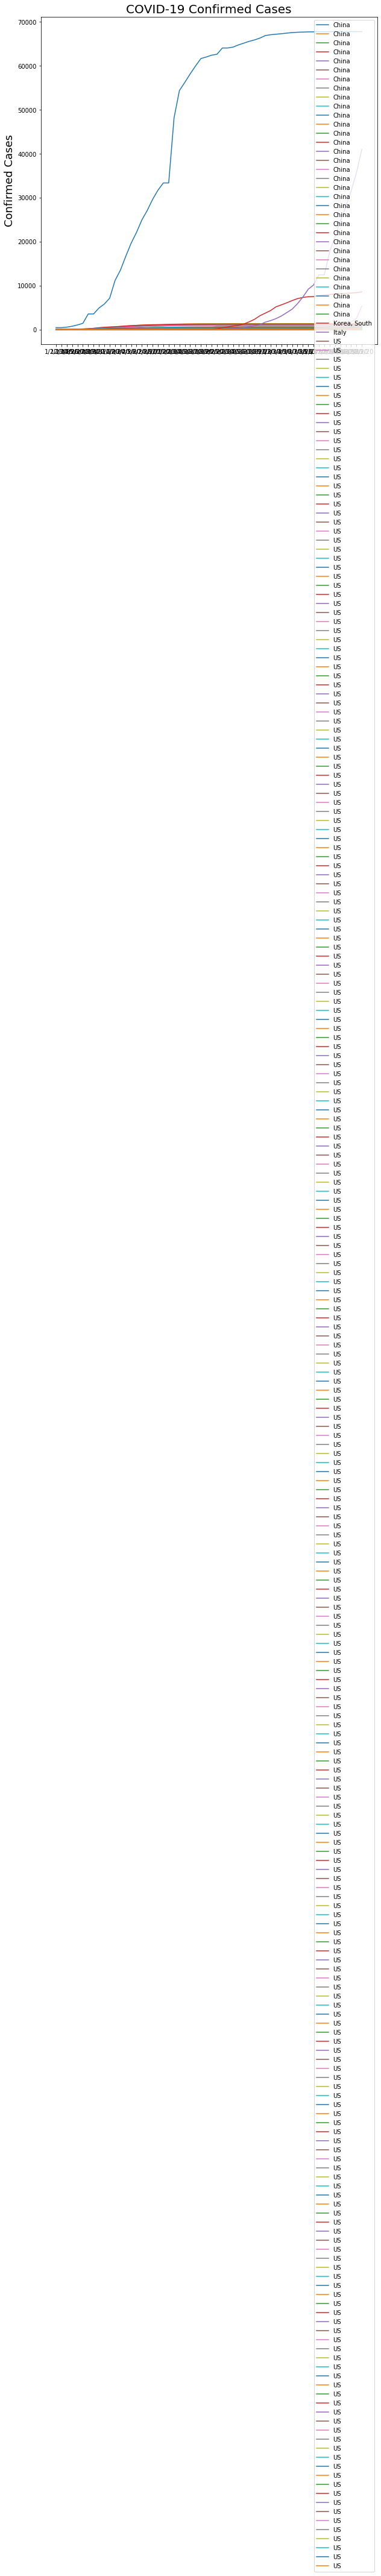

In [18]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_title("COVID-19 Confirmed Cases", fontsize=20)
ax1.set_ylabel('Confirmed Cases', color='black',fontsize=18)
plt.plot(dfC['date'],dfC['China'], label='China')
plt.plot(dfC['date'],dfC['Korea, South'], label = 'Korea, South')
plt.plot(dfC['date'],dfC['Italy'], label='Italy')
plt.plot(dfC['date'],dfC['US'], label='US')
plt.legend()
           
